In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from IPython.display import clear_output
from time import sleep
from pylab import rcParams

%matplotlib inline
%load_ext autoreload
%autoreload 2

rcParams['figure.figsize'] = 10, 20

In [2]:
from model.linear_observer_planter import LinearPlanterObserver
from env.env_naive_torus import NaiveSandbox
from loss.losses import sum_loss_l1
from model.a2c import *
from reward.rewards import AliveCellsReward

In [3]:
def probs_to_cells(probs, env, topk=3):
    probs_top_k, idx_top_k = probs.topk(topk)
    inserted_block = np.zeros(env.shape)
    inserted_block = inserted_block.flatten()
    inserted_block[idx_top_k] = 1
    return inserted_block.reshape(env.shape)

In [4]:
agent = ActorCritic(100, 10)

In [5]:
LR = 3e-3
N_GAMES = 2000

optimizer = optim.Adam(agent.parameters(), lr=LR)

In [6]:
# total_loss = agent.reflect(np.random.rand(10, 1000),list(range(10)), list(range(10)), list(range(10)))

In [7]:
# optimizer.zero_grad()
# total_loss.backward()
# nn.utils.clip_grad_norm_(agent.parameters(), 0.5)
# optimizer.step()

In [8]:
grid_size=(10,10)
agent_window_size = 10 

In [9]:
sandbox = NaiveSandbox(grid_size=grid_size)

In [11]:
list_loss = []
# dummy reward_f
from reward.rewards import AliveCellsReward
reward_f = AliveCellsReward()

In [23]:
iterations = 10
steps_after_action = 10

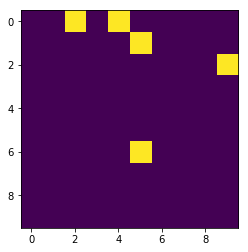

field after agent inference


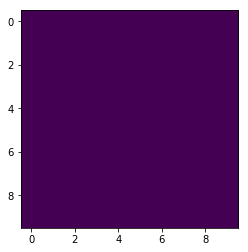

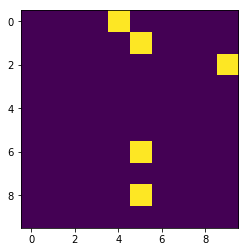

field after agent inference


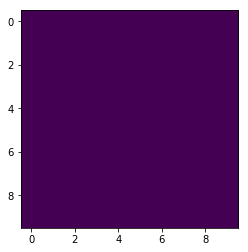

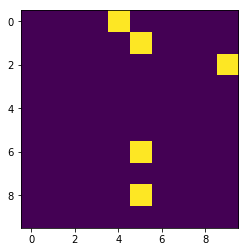

field after agent inference


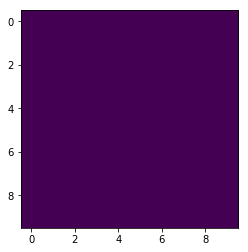

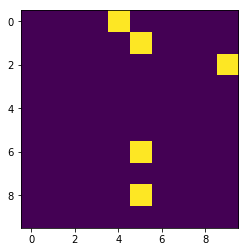

field after agent inference


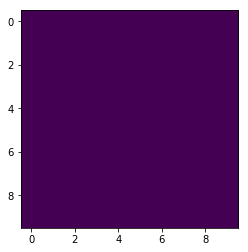

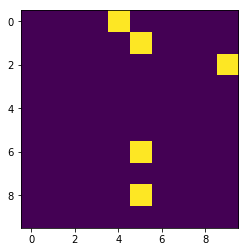

field after agent inference


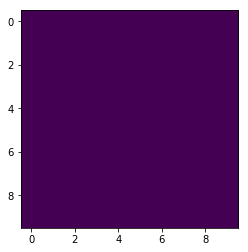

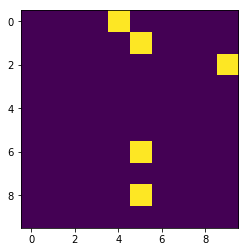

field after agent inference


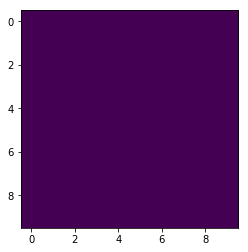

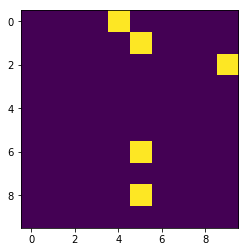

field after agent inference


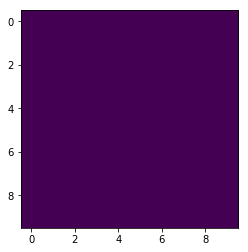

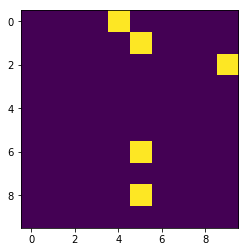

field after agent inference


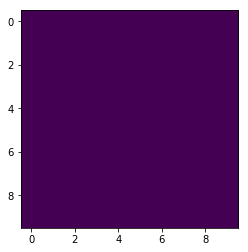

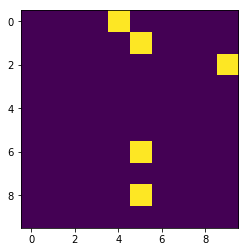

field after agent inference


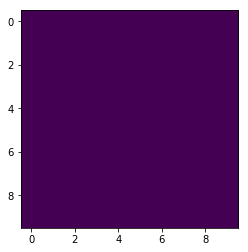

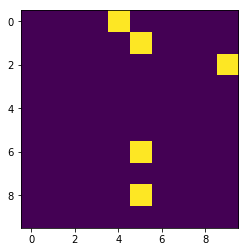

field after agent inference


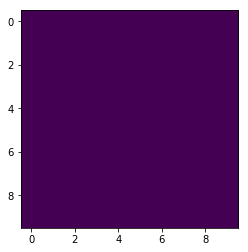

In [26]:
x0, y0 = 0, 0
steps_after_action = 1
for i in range(iterations):
    probs = agent.get_action_probs(torch.tensor(sandbox.get_grid()).float().flatten())
    perception_field = probs_to_cells(probs.detach(), sandbox.get_grid(), 5)
    #plt.imshow(perception_field)
    #plt.show()
    env_state = sandbox.forward(inserted_block=perception_field, 
                                inserted_block_position_x0=x0, 
                                inserted_block_position_y0=y0, 
                                n_steps=steps_after_action,
                                reward_fn=reward_f 
                               )
    #print (env_state)
    #clear_output(wait=True)
    plt.imshow(perception_field)
    plt.show()
    print('field after agent inference')
    plt.imshow(env_state['grid'])
    plt.show()
    
    
    